# Imports

In [1]:
import sys
import tensorflow as tf
import numpy as np
import itertools
import os

import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path

import pandas as pd
import pyemma

sys.path.append('gmvae')
from model import GMVAE
from dataset import load_and_mix_data_nolabel

matplotlib.rcParams.update({'font.size': 24})

# Paths

In [2]:
readdir = 'data/'
savedir = 'results/'
modeldir = 'models/'

# Load data

In [3]:
data = np.load(readdir + "traj_mb.npy")
data_list = []
for i in range(data.shape[0]):
    data_list.append(data[i, :, :])
data = data.reshape(len(data)*10000, 2)
dataset = load_and_mix_data_nolabel(data=data, test_ratio=0.01)

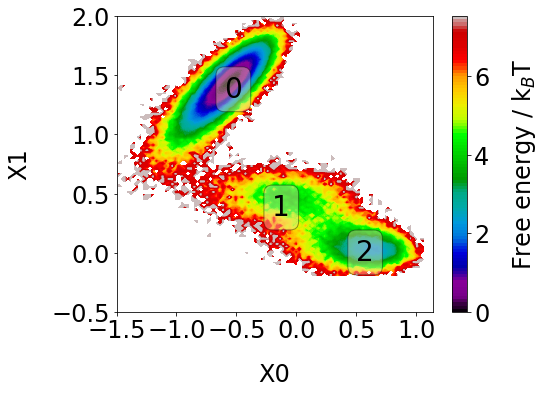

In [4]:
matplotlib.rcParams.update({'font.size': 24})
_, _, misc = pyemma.plots.plot_free_energy(data[:,0], data[:,1], nbins = 100, ncontours = 100, legacy = False)
cbar = misc['cbar']
cbar.set_label('Free energy / k$_{B}$T', labelpad=20)
cbar.set_ticks(np.arange(0, 8, 2))
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.xlabel('X0', labelpad=20)
plt.ylabel('X1', labelpad=20)
plt.yticks(np.arange(-0.5,2.1,0.5))
plt.xticks(np.arange(-1.5,1.5,0.5))
plt.text(-0.6, 1.5, '0', fontsize=28, verticalalignment='top', color='black', bbox=dict(facecolor='wheat', boxstyle='round', alpha=0.4))
plt.text(-0.2, 0.5, '1', fontsize=28, verticalalignment='top', color='black', bbox=dict(facecolor='wheat', boxstyle='round', alpha=0.4))
plt.text(0.5, 0.12, '2', fontsize=28, verticalalignment='top', color='black', bbox=dict(facecolor='wheat', boxstyle='round', alpha=0.4))
plt.tight_layout()
plt.savefig(savedir + 'FE.png')

# Load pre-trained model

In [5]:
model_path = modeldir + 'pre_trained'
results = '_results'

if not os.path.exists(model_path):
    os.makedirs(model_path)

results_dir_s = model_path+results

if not os.path.exists(results_dir_s):
    os.makedirs(results_dir_s)
    
results_dir = Path(results_dir_s)


unpkl = pd.read_pickle(model_path+'/' + 'training_params.pkl')

k = np.asscalar(unpkl.k[0])
n_x = np.asscalar(unpkl.n_x[0])
n_z = np.asscalar(unpkl.n_z[0])
n_epochs = np.asscalar(unpkl.n_epochs[0])
qy_dims = (unpkl.qy_dims[0])
qz_dims = (unpkl.qz_dims[0])
pz_dims = (unpkl.pz_dims[0])
px_dims = (unpkl.px_dims[0])
r_nent = np.asscalar(unpkl.r_nent[0])
batch_size = np.asscalar(unpkl.batch_size[0])
lr = np.asscalar(unpkl.lr[0])

model = GMVAE(model_path, k=k, n_x = n_x, n_z = n_z, qy_dims = qy_dims, #qy_dims = qy_dims,
             qz_dims = qz_dims, pz_dims = pz_dims, px_dims = px_dims, 
             r_nent = r_nent, batch_size = batch_size, lr=lr)

model.last_epoch = n_epochs






Instructions for updating:
Please use `layer.__call__` method instead.



/home/wright/anaconda3/envs/tensorflow1-env/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/home/wright/anaconda3/envs/tensorflow1-env/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/home/wright/anaconda3/envs/tensorflow1-env/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/home/wright/anaconda3/envs/tensorflow1-env/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/home/wright/anaconda3/envs/tensorflow1-env/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/home/wright/anaconda3/envs/tensorflow1-env/lib/python3.7/site-pa





graph written


# Encodings

In [6]:
qy = model.encode_y(data)
y_pred = np.argmax(qy, axis=1)
z = model.encode_z(data)

2022-03-02 08:36:42.034111: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-03-02 08:36:42.195971: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:969] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-03-02 08:36:42.196310: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA GeForce RTX 2060 SUPER major: 7 minor: 5 memoryClockRate(GHz): 1.65
pciBusID: 0000:09:00.0
2022-03-02 08:36:42.196894: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.0'; dlerror: libcudart.so.10.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/gromacs/lib
2022-03-02 08:36:42.197074: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcublas.so.10.0

INFO:tensorflow:Restoring parameters from models/pre_trained/model.ckpt-400


2022-03-02 08:36:42.445740: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:969] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-03-02 08:36:42.446227: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55b4c4a5b030 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-03-02 08:36:42.446264: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2022-03-02 08:36:42.446544: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-03-02 08:36:42.446553: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      


INFO:tensorflow:Restoring parameters from models/pre_trained/model.ckpt-400


2022-03-02 08:36:42.702247: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-03-02 08:36:42.702302: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      


INFO:tensorflow:Restoring parameters from models/pre_trained/model.ckpt-400


2022-03-02 08:36:43.158610: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-03-02 08:36:43.158668: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      


Distribution of z

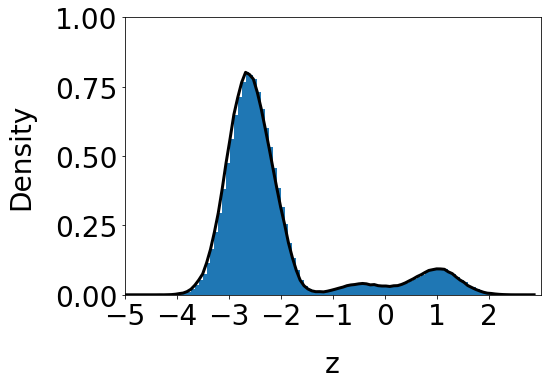

In [7]:
matplotlib.rcParams.update({'font.size': 28})
plt.figure(figsize=(8,6))
_ = plt.hist(z, bins= np.arange(-5, 3, 0.075), density=True)
ah = np.histogram(z, bins= np.arange(-5, 3, 0.075), density=True)
plt.plot(ah[1][:-1], ah[0], linewidth=3, color='k')
plt.ylabel('Density', labelpad=20)
plt.xlabel('z', labelpad=20)
plt.xticks(np.arange(-5, 3))
plt.xlim([-5, 3])
plt.ylim([0, 1])
titlename = 'z_histograms_line'
plt.tight_layout()
plt.savefig(str(results_dir) + '/z_histogram.png', bbox_inches='tight')

In [8]:
y_unq = np.unique(y_pred)
for i in range(len(y_unq)):
    y_pred[np.where(y_pred == y_unq[i])] = np.arange(0, len(y_unq))[i]

GMVAE clusters on the FEL

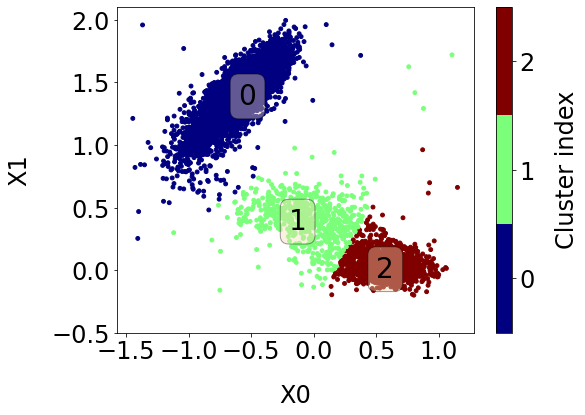

In [9]:
matplotlib.rcParams.update({'font.size': 24})
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
step=20
sc = axes.scatter(data[::step,0], data[::step,1], c=y_pred[::step], alpha=1, 
                  cmap=plt.cm.get_cmap('jet', len(np.unique(y_pred))), s=15)
cbar = fig.colorbar(sc, ax=axes)
cbar.set_alpha(1)
cbar.set_ticks(np.arange(0, 5, 1))
cbar.set_label('Cluster index', labelpad=20)
sc.set_alpha(1)
sc.set_clim(-0.5, len(np.unique(y_pred)) - 0.5)
cbar.draw_all()

axes.set_xlabel('X0', labelpad=20)
axes.set_ylabel('X1', labelpad=20)
axes.set_yticks(np.arange(-0.5,2.1,0.5))
axes.set_xticks(np.arange(-1.5,1.5,0.5))

axes.text(-0.6, 1.5, '0', fontsize=28, verticalalignment='top', color='black', bbox=dict(facecolor='wheat', boxstyle='round', alpha=0.4))
axes.text(-0.2, 0.5, '1', fontsize=28, verticalalignment='top', color='black', bbox=dict(facecolor='wheat', boxstyle='round', alpha=0.4))
axes.text(0.5, 0.12, '2', fontsize=28, verticalalignment='top', color='black', bbox=dict(facecolor='wheat', boxstyle='round', alpha=0.4))
fig.savefig(str(results_dir) + '/GMVAE_clusters.png', bbox_inches='tight')

Reconstructions

INFO:tensorflow:Restoring parameters from models/pre_trained/model.ckpt-400


2022-03-02 08:36:50.979273: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-03-02 08:36:50.979328: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      


INFO:tensorflow:Restoring parameters from models/pre_trained/model.ckpt-400


2022-03-02 08:36:51.731291: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-03-02 08:36:51.731354: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      


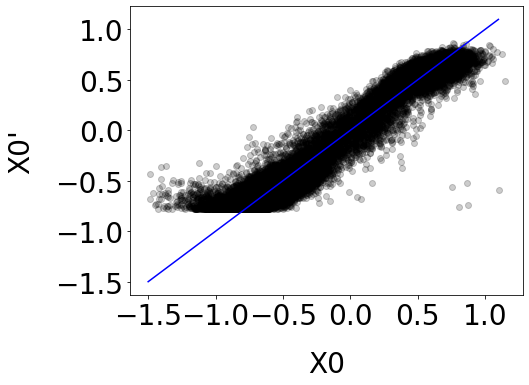

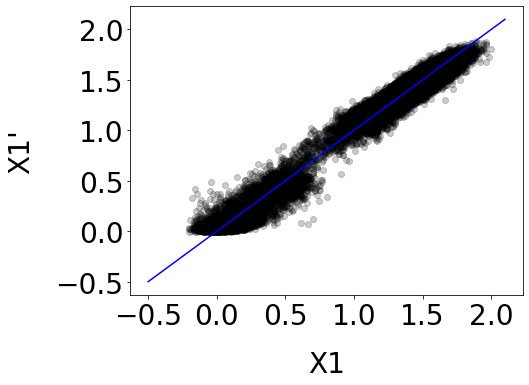

In [10]:
matplotlib.rcParams.update({'font.size': 28})

plt.figure(figsize=(8,6))
x = model.reconstruct(data)
plt.scatter(data[::5,0], x[::5,0], color = 'k', alpha=0.2)
plt.xlabel("X0", labelpad=20)
plt.ylabel("X0'", labelpad=20)
lims = [-1.5, 1.1]
plt.plot(lims, lims, 'b-', alpha=1)
plt.xticks(np.arange(-1.5, 1.1, step=0.5))
plt.yticks(np.arange(-1.5, 1.1, step=0.5))
plt.tight_layout()
plt.savefig(str(results_dir) + '/reconst_X0.png')

plt.figure(figsize=(8,6))
plt.scatter(data[::5,1], x[::5,1], color = 'k', alpha=0.2)
plt.xlabel("X1", labelpad=20)
plt.ylabel("X1'", labelpad=20)
lims = [-0.5, 2.1]
plt.plot(lims, lims, 'b-', alpha=1)
plt.xticks(np.arange(-0.5, 2.1, step=0.5))
plt.yticks(np.arange(-0.5, 2.1, step=0.5))
plt.tight_layout()
plt.savefig(str(results_dir) + '/reconst_X1.png')


# MSM Analysis

Convert cluster data into list

In [11]:
y_pred_list = []
for i in range(30):
    y_pred_list.append(y_pred[i*10000: (i+1)*10000])

Implied timescale test

estimating BayesianMSM:   0%|                                                                     | 0/9 [00:00…

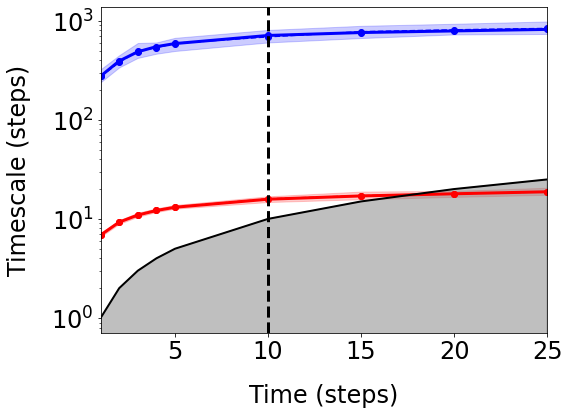

In [12]:
plt.rcParams.update({'font.size': 24})
cklag = 10
its = pyemma.msm.its(y_pred_list, lags=[1, 2, 3, 4, 5, 10, 15, 20, 25], errors='bayes')
fig, axes = plt.subplots(nrows=1, ncols = 1, figsize=(8,6))
pyemma.plots.plot_implied_timescales(its, marker = 'o', ylog=True, units='steps', ax = axes, linewidth=3)
axes.axvline(cklag, color ='black', linewidth = 3, linestyle='--'  )
titlename = "its"
axes.set_xlabel('Time (steps)', labelpad=20)
axes.set_ylabel('Timescale (steps)', labelpad=20)
fig.savefig(str(results_dir) + '/its.png', bbox_inches='tight')

Chapman-Kolmogorov test

estimating MaximumLikelihoodMSM:   0%|                                                            | 0/9 [00:00…

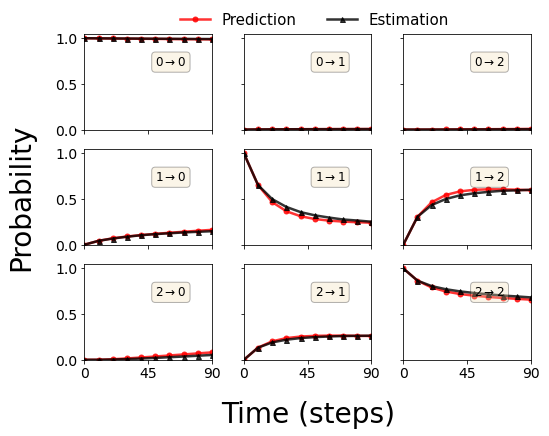

In [13]:
nc = 3
matplotlib.rcParams.update({'font.size': 14})
msm = pyemma.msm.estimate_markov_model(y_pred_list, lag=cklag, dt_traj='1 ps')
cktestobj = msm.cktest(nc, memberships =np.eye(nc))
fig, axes = plt.subplots(figsize=(8,6), nrows=nc, ncols=nc, sharex = True, sharey=True)
axes=axes.ravel()
xlimits=[0, cklag*9]
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)

for k in range(nc**2):
    j=k%nc
    i=k//nc
    axes[k].plot(cktestobj.lagtimes, cktestobj.predictions[:, i, j], color='red',
                 linewidth=2.5, alpha = 0.8, marker='o', markersize=5, linestyle='-', label='Prediction')
    axes[k].plot(cktestobj.lagtimes, cktestobj.estimates[:, i, j], color='black',
                 linewidth=2.5, alpha = 0.8, marker="^", markersize=5, label='Estimation')
    axes[k].text(cklag*5, 0.7, str(i)+r'$\rightarrow$'+str(j), fontsize=12, bbox=props)
    axes[k].set_ylim([0, 1.05])
    axes[k].set_xlim([0, cklag*9])
    axes[k].set_xticks(np.arange(xlimits[0], xlimits[1]+0.1, xlimits[1]//2, dtype='int'))
    axes[k].set_yticks(np.arange(0, 1.01, 0.5))
titlename = "ck_test"
plt.legend( loc = [-1.8, 3.4], ncol=2, frameon=False, fontsize=15)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor= 'none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Time (steps)', fontsize=28, labelpad=20)
plt.ylabel('Probability', labelpad = 20, fontsize=28)
plt.grid(False)
plt.subplots_adjust(wspace=0.25)
fig.savefig(str(results_dir)+'/gmvae_ck.png', bbox_inches='tight')